In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

### Balancing Compute with Memory Bandwidth 

In [7]:
width_mmu = np.array([0.5, 1])
dims = np.array(range(64,1024, 64))

perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                            mlB=np.array([256/8]),
                            M=dims,
                            N=dims,
                            K=dims,
                            width_mmu=width_mmu
                            )

100%|██████████| 6750/6750 [01:10<00:00, 96.37it/s] 


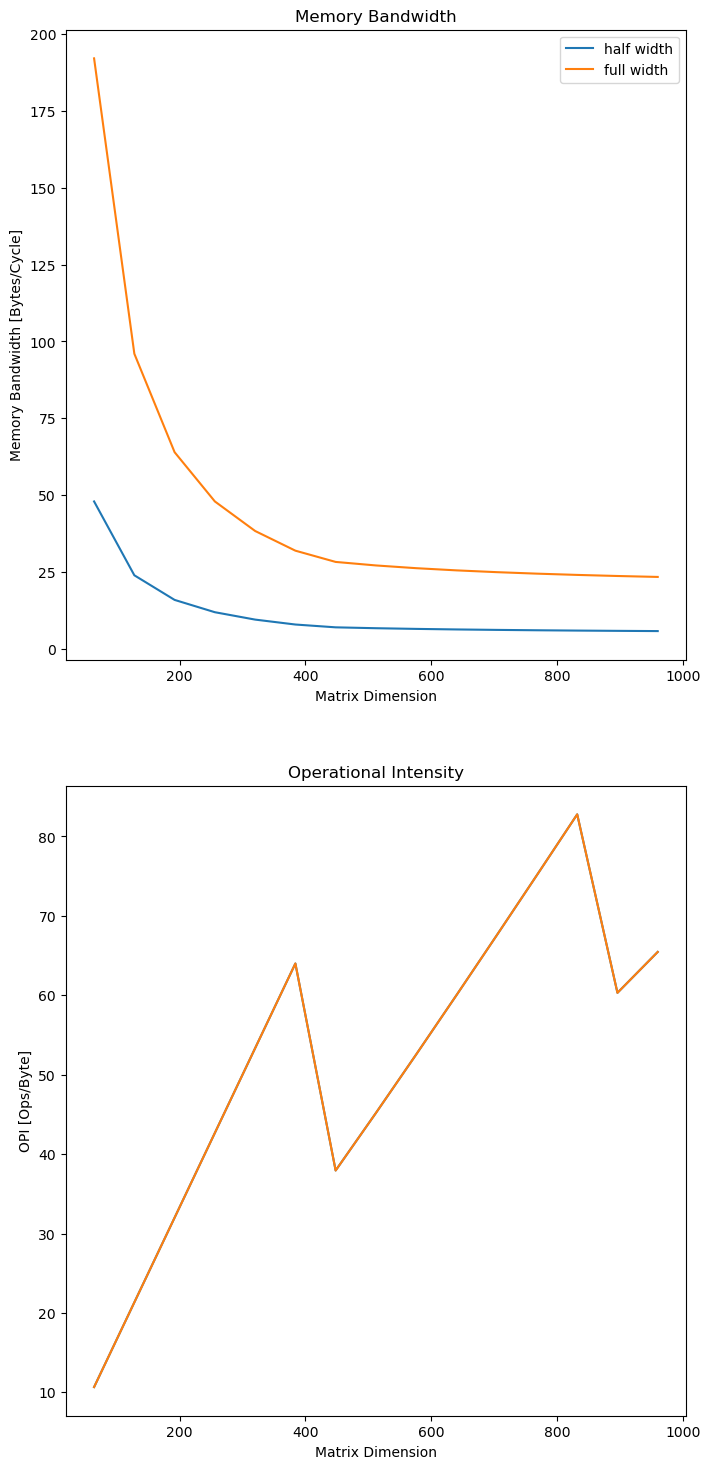

In [8]:
fig, axs = plt.subplots(2, figsize=(8,18))
axs[0].set_title('Memory Bandwidth')
axs[0].set_xlabel('Matrix Dimension')
axs[0].set_ylabel('Memory Bandwidth [Bytes/Cycle]')
axs[1].set_title('Operational Intensity')
axs[1].set_xlabel('Matrix Dimension')
axs[1].set_ylabel('OPI [Ops/Byte]')

for w in width_mmu:
    blas_mem_bw = np.zeros(len(dims))
    blas_mem_opi = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        blas_mem_bw[i] = perf_model.xs((dim, dim, dim, w), level=['M', 'N', 'K','width_mmu'])['blas_mem_bw'].values
        blas_mem_opi[i] = perf_model.xs((dim, dim, dim, w), level=['M', 'N', 'K','width_mmu'])['blas_mem_opi'].values

    axs[0].plot(dims, blas_mem_bw)
    axs[1].plot(dims, blas_mem_opi)

axs[0].legend(['half width','full width'])




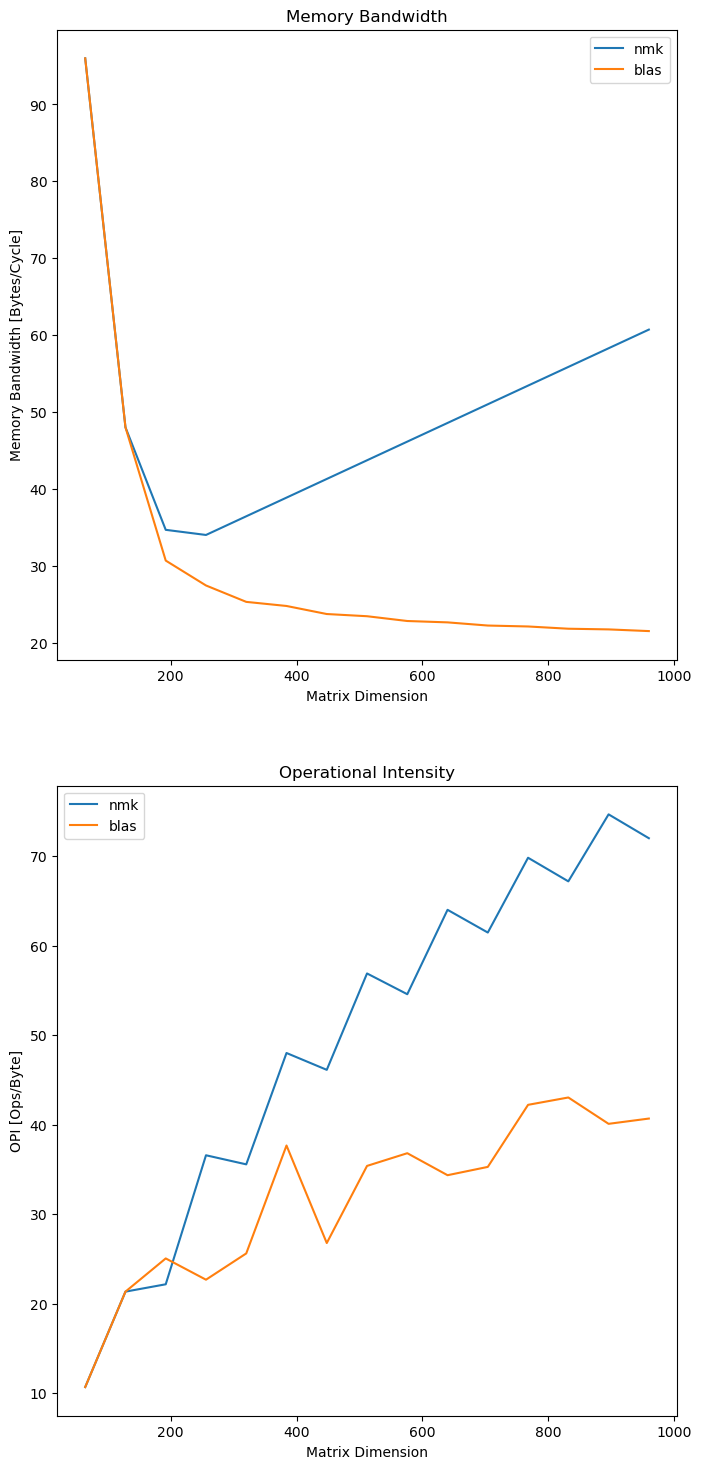

In [3]:
fig, axs = plt.subplots(2, figsize=(8,18))
axs[0].set_title('Memory Bandwidth')
axs[0].set_xlabel('Matrix Dimension')
axs[0].set_ylabel('Memory Bandwidth [Bytes/Cycle]')
axs[1].set_title('Operational Intensity')
axs[1].set_xlabel('Matrix Dimension')
axs[1].set_ylabel('OPI [Ops/Byte]')

width_mmu = np.array([0.5])
for w in width_mmu:
    nmk_mem_bw = np.zeros(len(dims))
    nmk_mem_opi = np.zeros(len(dims))
    blas_mem_bw = np.zeros(len(dims))
    blas_mem_opi = np.zeros(len(dims))
    opc = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        nmk_mem_bw[i] = perf_model.xs((dim, dim, dim, w), level=['M', 'N', 'K','width_mmu'])['nmk_mem_bw'].values
        blas_mem_bw[i] = perf_model.xs((dim, dim, dim, w), level=['M', 'N', 'K','width_mmu'])['blas_mem_bw'].values
        nmk_mem_opi[i] = perf_model.xs((dim, dim, dim, w), level=['M', 'N', 'K','width_mmu'])['nmk_mem_opi'].values
        blas_mem_opi[i] = perf_model.xs((dim, dim, dim, w), level=['M', 'N', 'K','width_mmu'])['blas_mem_opi'].values

    axs[0].plot(dims, nmk_mem_bw)
    axs[0].plot(dims, blas_mem_bw)
    axs[1].plot(dims, nmk_mem_opi)
    axs[1].plot(dims, blas_mem_opi)

axs[0].legend(['nmk','blas'])
axs[1].legend(['nmk','blas'])



Text(0, 0.5, 'OPI [Ops/Byte]')

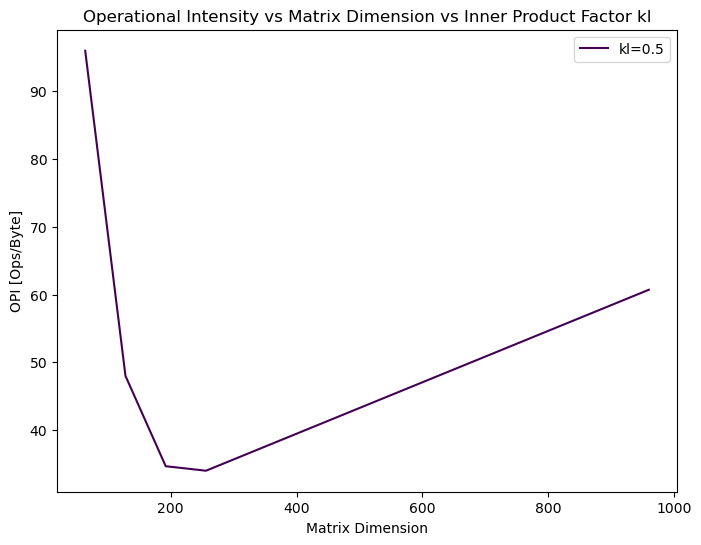

In [5]:
fig, axs = plt.subplots(figsize=(8,6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=width_mmu.min(), vmax=width_mmu.max())

for kl in width_mmu:
    nmk_mem_bw = np.zeros(len(dims))
    blas_mem_bw = np.zeros(len(dims))
    opc = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        nmk_mem_bw[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','width_mmu'])['nmk_mem_bw'].values
        nmk_mem_opi[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','width_mmu'])['nmk_mem_opi'].values
        blas_mem_bw[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','width_mmu'])['nmk_mem_bw'].values
        blas_mem_opi[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','width_mmu'])['nmk_mem_opi'].values

    axs.plot(dims, blas_mem_bw, color=cmap(norm(kl)))

axs.legend([f'kl={kl}' for kl in width_mmu])
axs.set_title('Operational Intensity vs Matrix Dimension vs Inner Product Factor kl')
axs.set_xlabel('Matrix Dimension')
axs.set_ylabel('OPI [Ops/Byte]')


In [ ]:
perf_model = fmodel.init_pm(
    mlB = np.array(range(128,513, 64))/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    l2_cache= np.array([32]),
    # num_mregs = np.array(range(2,6,2)),
    # t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5, 1]),
)

  0%|          | 0/21504 [00:00<?, ?it/s]

100%|██████████| 21504/21504 [00:16<00:00, 1342.68it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        20    36 60 4  32       1  16.0 40.0 2         2    4     0.5        200.0   
               44 60 4  32       1  16.0 48.0 2         2    4     0.5        232.0   
                     60 32       1  16.0 24.0 2         2    4     0.5        280.0   
                                    32.0 24.0 2         2    4     0.5        280.0   
               52 60 4  32       1  16.0 56.0 2         2    4     0.5        264.0   
               60 60 4  32       1  16.0 32.0 2         2    4     0.5        168.0   
                                         64.0 2         2    4     0.5        296.0   
                     60 32       1  16.0 16.0 2         2    4     0.5        280.0   

                                                                                  util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    36 60 4  32       1  16.0 40.0 2         2    4     0.5        0.843750   
               44 60 4  32       1  16.0 48.0 2         2    4     0.5        0.859375   
                     60 32       1  16.0 24.0 2         2    4     0.5        0.859375   
                                    32.0 24.0 2         2    4     0.5        0.859375   
               52 60 4  32       1  16.0 56.0 2         2    4     0.5        0.870536   
               60 60 4  32       1  16.0 32.0 2         2    4     0.5        0.878906   
                                         64.0 2         2    4     0.5        0.878906   
                     60 32       1  16.0 16.0 2         2    4     0.5        0.878906   

                                                                              ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    36 60 4  32       1  16.0 40.0 2         2    4     0.5            540.0   
               44 60 4  32       1  16.0 48.0 2         2    4     0.5            660.0   
                     60 32       1  16.0 24.0 2         2    4     0.5            330.0   
                                    32.0 24.0 2         2    4     0.5            660.0   
               52 60 4  32       1  16.0 56.0 2         2    4     0.5            780.0   
               60 60 4  32       1  16.0 32.0 2         2    4     0.5            450.0   
                                         64.0 2         2    4     0.5            900.0   
                     60 32       1  16.0 16.0 2         2    4     0.5            225.0   

                                                                              max_mregs  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    36 60 4  32       1  16.0 40.0 2         2    4     0.5              2.0   
               44 60 4  32       1  16.0 48.0 2         2    4     0.5              2.0   
                     60 32       1  16.0 24.0 2         2    4     0.5              2.0   
                                    32.0 24.0 2         2    4     0.5              2.0   
               52 60 4  32       1  16.0 56.0 2         2    4     0.5              2.0   
               60 60 4  32       1  16.0 32.0 2         2    4     0.5              2.0   
                                         64.0 2         2    4     0.5              2.0   
                     60 32       1  16.0 16.0 2         2    4     0.5              2.0   

                                                                              max_mrf_capacity  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                     
8        20    36 60 4  32       1  16.0 40.0 2         2    4     0.5                5.109375   
               44 60 4  32       1  16.0 48.0 2         2    4     0.5                6.125000   
                     60 32       1  16.0 24.0 2         2    4     0.5                3.07812

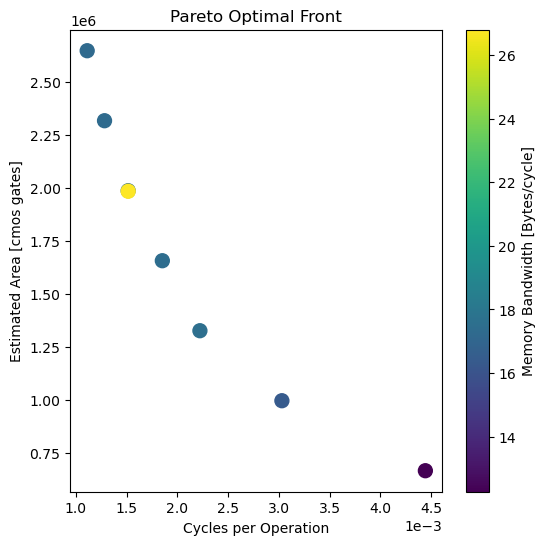

In [ ]:
perf_model = perf_model[perf_model['mrf_bw'] <= 32]
# perf_model = perf_model[perf_model['ops_cycle'] >= 1/4e-2]

pm_pareto = perf_model[['ops_cycle','opu_gates', 'mrf_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model.loc[mask,'mrf_bw']
ngates = perf_model.loc[mask,'opu_gates']
opc = perf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Memory Bandwidth [Bytes/cycle]')
perf_model[mask]

In [4]:
perf_model = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5, 1])
)
perf_model = perf_model[perf_model['max_mem_bw'] <= 64]
perf_model = perf_model[perf_model['ops_cycle'] >= 1/4e-2]

pm_pareto = perf_model[['ops_cycle','opu_gates', 'max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model.loc[mask,'max_mem_bw']
ngates = perf_model.loc[mask,'opu_gates']
opc = perf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Memory Bandwidth [Bytes/cycle]')
perf_model[mask]

100%|██████████| 239616/239616 [03:02<00:00, 1311.76it/s]


KeyError: 'max_mem_bw'

In [ ]:
pm_pareto = perf_model[['speedup_vec','util']]
mask = paretoset(pm_pareto, sense=['min', 'min'])

speedup_vec = perf_model.loc[mask,'speedup_vec']
util = perf_model.loc[mask,'util']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('speedup_vec')
axs.set_ylabel('utilization')

scatter = axs.scatter(speedup_vec, util)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
perf_model[mask]

#### Memory Data Reuse
If the matrices are sufficiently large to reuse tiles, then bandwidth can be decreased:

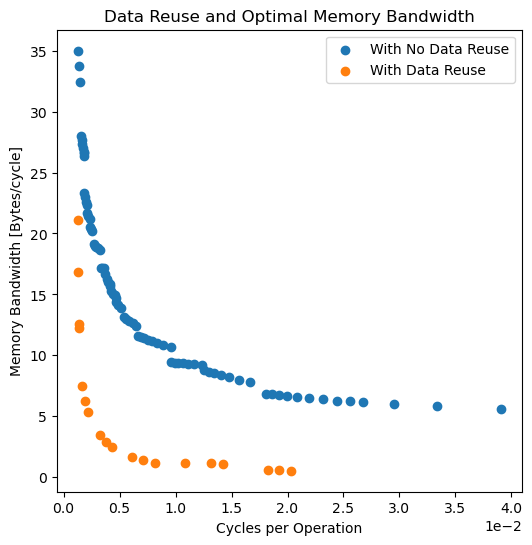

In [11]:
no_reuse_pm = perf_model.copy()
pm_pareto = no_reuse_pm[['ops_cycle','max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = no_reuse_pm.loc[mask,'max_mem_bw']
opc = no_reuse_pm.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
scatter = axs.scatter(1/opc, bw, label='With No Data Reuse')

reuse_perf_model = perf_model.copy()
reuse_perf_model = reuse_perf_model[reuse_perf_model['mem_bw'] <= 64]
reuse_perf_model = reuse_perf_model[reuse_perf_model['ops_cycle'] >= 1/(4e-2)]

pm_pareto = reuse_perf_model[['ops_cycle','mem_bw']]
reuse_mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = reuse_perf_model.loc[reuse_mask,'mem_bw']
opc = reuse_perf_model.loc[reuse_mask,'ops_cycle']

scatter = axs.scatter(1/opc, bw, label='With Data Reuse')
axs.set_title('Data Reuse and Optimal Memory Bandwidth')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Memory Bandwidth [Bytes/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()


We can compare these tradeoffs for half-width and full-width MMU datapaths:

In [13]:
perf_model = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5, 1])
)
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5])
)
perf_model_t1 = perf_model_t1[perf_model_t1['max_mem_bw'] <= 64]
bw = perf_model_t1['max_mem_bw']
ngates = perf_model_t1['opu_gates']
opc = perf_model_t1['ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['max_mem_bw'] <= 64]
bw_t4 = perf_model_t4['max_mem_bw']
ngates_t4 = perf_model_t4['opu_gates']
opc_t4 = perf_model_t4['ops_cycle']

fig, axs = plt.subplots(2, figsize=(6, 8))
# Plot for full width datapath
axs[0].set_title('Full Width Datapath')
axs[0].set_xlabel('Cycles per Operation')
axs[0].set_ylabel('Estimated Area [cmos gates]')
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
full = axs[0].scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs[0], label='Full Width BW [Bytes/cycle]')

# Plot for half width datapath
axs[1].set_title('Half Width Datapath')
axs[1].set_xlabel('Cycles per Operation')
axs[1].set_ylabel('Estimated Area [cmos gates]')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
half = axs[1].scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs[1], label='Half Width BW [Bytes/cycle]')
plt.tight_layout()
plt.show()


 23%|██▎       | 55687/239616 [00:40<02:15, 1361.47it/s]


KeyboardInterrupt: 

100%|██████████| 585/585 [00:00<00:00, 1542.57it/s]


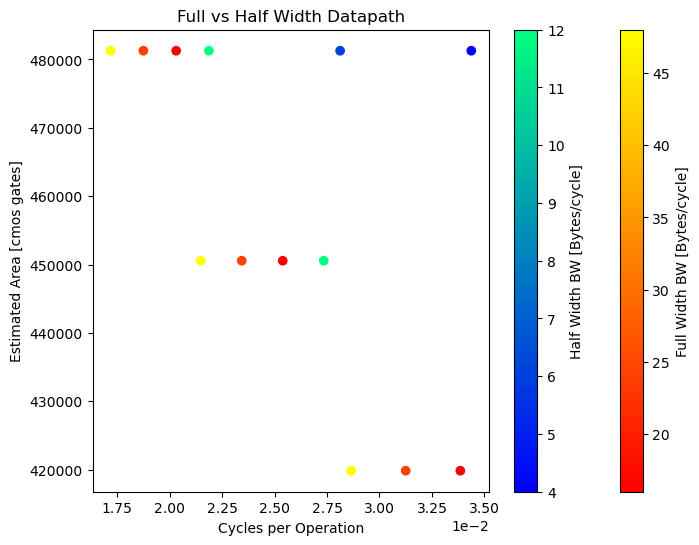

In [ ]:
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5])
)
perf_model_t1 = perf_model_t1[perf_model_t1['max_mem_bw'] <= 64]
perf_model_t1 = perf_model_t1[perf_model_t1['opu_gates'] <= 2e6]
perf_model_t1 = perf_model_t1[perf_model_t1['ops_cycle'] >= 1/3.5e-2]

pm_pareto = perf_model_t1[['ops_cycle','opu_gates', 'max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model_t1.loc[mask,'max_mem_bw']
ngates = perf_model_t1.loc[mask,'opu_gates']
opc = perf_model_t1.loc[mask,'ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['max_mem_bw'] <= 64]
perf_model_t4 = perf_model_t4[perf_model_t4['opu_gates'] <= 2e6]
perf_model_t4 = perf_model_t4[perf_model_t4['ops_cycle'] >= 1/3.5e-2]

pm_pareto_t4 = perf_model_t4[['ops_cycle','opu_gates', 'max_mem_bw']]
mask_t4 = paretoset(pm_pareto_t4, sense=['max', 'min', 'min'])

bw_t4 = perf_model_t4.loc[mask_t4,'max_mem_bw']
ngates_t4 = perf_model_t4.loc[mask_t4,'opu_gates']
opc_t4 = perf_model_t4.loc[mask_t4,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(8,6))
axs.set_title('Full vs Half Width Datapath')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

full = axs.scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs, label = 'Full Width BW [Bytes/cycle]')

half = axs.scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs, label = 'Half Width BW [Bytes/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [ ]:
perf_model_t4.loc[mask_t4]

t_uk  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu         
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5        56.0   
                                           10        0    0.5        88.0   
                                                     1    0.5        72.0   
                                                     2    0.5        56.0   

                                                                         util  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5        0.571429   
                                           10        0    0.5        0.454545   
                                                     1    0.5        0.555556   
                                                     2    0.5        0.714286   

                                                                     ops_cycle  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5        36.571429   
                                           10        0    0.5        29.090909   
                                                     1    0.5        35.555556   
                                                     2    0.5        45.714286   

                                                                     max_mregs  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5              4.0   
                                           10        0    0.5              2.0   
                                                     1    0.5              3.0   
                                                     2    0.5              4.0   

                                                                     max_mrf_capacity  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu                     
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5                 0.37500   
                                           10        0    0.5                 0.18750   
                                                     1    0.5                 0.28125   
                                                     2    0.5                 0.37500   

                                                                     mem_bw  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu           
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5           8.5   
                                           10        0    0.5           2.8   
                                                     1    0.5           4.2   
                                                     2    0.5           8.4   

                                                                     max_mem_bw  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu               
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5              12.0   
                                           10        0    0.5               4.0   
                                                     1    0.5               6.0   
                                                     2    0.5              12.0   

                                                                     mrf_capacity  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu                 
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5              0.7500   
                                           10        0    0.5              0.9375   
                                                     1    0.5              0.9375   
                                                     2    0.5              0.9375   

                                                                        mrf_bw  \
databits t_mem M N K l2_cache k

In [ ]:
perf_model_t1.loc[mask]

t_uk  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu         
32       20    4 4 4 256      1  16.0 16.0 6         0    1          52.0   
                                                     1    1          48.0   
                                                     2    1          44.0   
                                           8         0    1          52.0   
                                                     1    1          48.0   
                                                     2    1          44.0   
                                           10        0    1          52.0   
                                                     1    1          48.0   
                                                     2    1          44.0   

                                                                         util  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4 4 4 256      1  16.0 16.0 6         0    1          0.461538   
                                                     1    1          0.500000   
                                                     2    1          0.545455   
                                           8         0    1          0.615385   
                                                     1    1          0.666667   
                                                     2    1          0.727273   
                                           10        0    1          0.769231   
                                                     1    1          0.833333   
                                                     2    1          0.909091   

                                                                     ops_cycle  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 6         0    1          29.538462   
                                                     1    1          32.000000   
                                                     2    1          34.909091   
                                           8         0    1          39.384615   
                                                     1    1          42.666667   
                                                     2    1          46.545455   
                                           10        0    1          49.230769   
                                                     1    1          53.333333   
                                                     2    1          58.181818   

                                                                     max_mregs  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 6         0    1                5.0   
                                                     1    1                6.0   
                                                     2    1               11.0   
                                           8         0    1                5.0   
                                                     1    1                6.0   
                                                     2    1               11.0   
                                           10        0    1                5.0   
                                                     1    1                6.0   
                                                     2    1               11.0   

                                                                     max_mrf_capacity  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu                     
32       20    4 4 4 256      1  16.0 16.0 6         0    1                   0.46875   
                                                     1    1                   0.56250   
                                                     2    1                   1.03125   
                                           8         0    1                   